# API extraction

In this notebook we will be analysing the changes on flight patterns during the hurricane Katrina.  Katrina took place from the 23rd of August to the 31th of August 2005 touching ground on 25th August and travelling into the USA. In order to better appreciate the impact of the hurricane, I have decided to compare the flight patterns before and after the hurricane in 5 different cities.

The cities I have chosen are: Miami, New Orleans, Nashville, Montgomery, and Columbia.
The dates I have chosen are: from 24th of August until 1st September 2005.

For this, we need to extract data on weather and flights from two sources. I have chosen MeteoStat and TranStats.

Setting up the environment:

In [1]:
import os
import pandas as pd
import numpy as np
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files
import time
import json
from dotenv import load_dotenv
load_dotenv()
import matplotlib.pyplot as plt

# 1. Download flight data from API

In [5]:
# Data will be stored in folder "data"
path = 'data/'

Katrina took place at the end of August. In order to appreciate better the changes on flight patterns, I will be downloading data from August and September 2005. First I will be defining two functions to download the data into a zip folder and another to extract the data from the zip folder.

In [2]:
def download_data (year, month):
    zip_file = f'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_{year}_{month}.zip' #store
    url = (f'https://transtats.bts.gov/PREZIP/{zip_file}')
    r = requests.get(f'{url}', verify=False) #downloading database
    #saving into local storage
    with open(path+zip_file, 'wb') as f:
        f.write(r.content)
        print(f' --> zip_file with name: {zip_file} downloaded successfully.')

In [3]:
def extract_zip(year, month):
    zip_file = f'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_{year}_{month}.zip'

    with ZipFile(path+zip_file, 'r') as zip_ref:
        zip_ref.extractall(path)
        csv_file = zip_ref.namelist()[0]
        print(f'--> zip_file was successfully extracted to: {csv_file}.' )

In [6]:
#Let's define the year and months we need
year_list = [2005] #can be a single year or more
months_list = [8, 9]

#downloading flight data as zipfile

for year in year_list:
    for month in months_list:
        download_data(year, month)
        extract_zip(year, month)

c:\Users\fiori\miniconda3\envs\nf_sql\lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'transtats.bts.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


 --> zip_file with name: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2005_8.zip downloaded successfully.
--> zip_file was successfully extracted to: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2005_8.csv.


c:\Users\fiori\miniconda3\envs\nf_sql\lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'transtats.bts.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


 --> zip_file with name: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2005_9.zip downloaded successfully.
--> zip_file was successfully extracted to: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2005_9.csv.


As a result I get two zip files, each per month as a csv file. My goal now is to load them into dataframes_ df_august and df_september.

August flight data

In [8]:
csv_file = 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2005_8.csv'

df_august = pd.read_csv(path+csv_file, low_memory=False)
display(df_august.shape)
display(df_august.head())

(630904, 110)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2005,3,8,20,6,2005-08-20,DL,19790,DL,N908DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,3,8,20,6,2005-08-20,DL,19790,DL,N112DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,3,8,20,6,2005-08-20,DL,19790,DL,N989DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,3,8,20,6,2005-08-20,DL,19790,DL,N989DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,3,8,20,6,2005-08-20,DL,19790,DL,N947DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


September flight data

In [9]:
csv_file_sept = 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2005_9.csv'

df_september = pd.read_csv(path+csv_file_sept, low_memory=False)
display(df_september.shape)
display(df_september.head())

(574253, 110)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2005,3,9,1,4,2005-09-01,AA,19805,AA,N328AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,3,9,2,5,2005-09-02,AA,19805,AA,N376AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,3,9,3,6,2005-09-03,AA,19805,AA,N335AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,3,9,4,7,2005-09-04,AA,19805,AA,N329AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,3,9,5,1,2005-09-05,AA,19805,AA,N319AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Clean flight dataframes

I have two dataframes with data from August and September 2005. Now, I will check columns, which ones should be kept and changed.

In [11]:
df_august.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630904 entries, 0 to 630903
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(75), int64(20), object(15)
memory usage: 529.5+ MB


In [13]:
df_august.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       ...
       'Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
       'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff',
       'Div5TailNum', 'Unnamed: 109'],
      dtype='object', length=110)

As seen, there are 110 columns. Instead of dropping columns, let's select which ones are needed.

In [14]:
columns_to_keep = [
                'FlightDate',
                'DepTime',
                'CRSDepTime',
                'DepDelay',
                'ArrTime',
                'CRSArrTime',
                'ArrDelay',
                'Reporting_Airline',
                'Tail_Number',
                'Flight_Number_Reporting_Airline',
                'Origin',
                'Dest',
                'AirTime',
                'ActualElapsedTime',
                'Distance',
                'Cancelled',
                'Diverted'
]

In [15]:
#Setting new names
new_column_names =[
                'flight_date',
                'dep_time',
                'sched_dep_time',
                'dep_delay',
                'arr_time',
                'sched_arr_time',
                'arr_delay',
                'airline',
                'tail_number',
                'flight_number',
                'origin',
                'dest',
                'air_time',
                'actual_elapsed_time',
                'distance',
                'cancelled',
                'diverted'
]

In [16]:
def clean_airline_df(df):
    '''
    Builds a dataframe with the selected columns. 
    Also transforms dtypes (to datetime + to numeric). Output  is the clean df
    '''
    #New df with selected columns
    df_airline = df.loc[:, columns_to_keep]

    #Transform dtypes and cleaning NULLs
    df_airline['FlightDate'] = pd.to_datetime(df_airline['FlightDate'], yearfirst=True)
    df_airline['CRSArrTime']= pd.to_numeric(df_airline['CRSArrTime'], downcast='integer', errors='coerce')
    df_airline['Cancelled']= pd.to_numeric(df_airline['Cancelled'], downcast='integer')
    df_airline['Diverted']= pd.to_numeric(df_airline['Diverted'], downcast='integer')
    df_airline['ActualElapsedTime']= pd.to_numeric(df_airline['ActualElapsedTime'], downcast='integer', errors='coerce')

    #Renaming columns
    df_airline.columns = new_column_names

    return df_airline

August 

In [17]:
df_clean_august = clean_airline_df(df_august)
df_clean_august.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
0,2005-08-20,728.0,720,8.0,1044.0,1016,28.0,DL,N908DL,992,SEA,SLC,92.0,136.0,689.0,0,0
1,2005-08-20,2036.0,2039,-3.0,2231.0,2239,-8.0,DL,N112DL,994,MIA,ATL,81.0,115.0,595.0,0,0
2,2005-08-20,749.0,750,-1.0,851.0,905,-14.0,DL,N989DL,995,CHS,ATL,54.0,62.0,259.0,0,0
3,2005-08-20,1024.0,1025,-1.0,1244.0,1248,-4.0,DL,N989DL,995,ATL,BDL,118.0,140.0,859.0,0,0
4,2005-08-20,732.0,735,-3.0,933.0,946,-13.0,DL,N947DL,997,MCO,CVG,105.0,121.0,756.0,0,0


September

In [18]:
df_clean_september = clean_airline_df(df_september)
df_clean_september.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
0,2005-09-01,856.0,900,-4.0,1149.0,1153,-4.0,AA,N328AA,1,JFK,LAX,320.0,353.0,2475.0,0,0
1,2005-09-02,910.0,900,10.0,1231.0,1153,38.0,AA,N376AA,1,JFK,LAX,316.0,381.0,2475.0,0,0
2,2005-09-03,901.0,900,1.0,1157.0,1153,4.0,AA,N335AA,1,JFK,LAX,323.0,356.0,2475.0,0,0
3,2005-09-04,852.0,900,-8.0,1128.0,1153,-25.0,AA,N329AA,1,JFK,LAX,321.0,336.0,2475.0,0,0
4,2005-09-05,859.0,900,-1.0,1148.0,1153,-5.0,AA,N319AA,1,JFK,LAX,316.0,349.0,2475.0,0,0


For this project, only 5 cities are needed. Let's filter with a new function.
Under column 'origin' and 'dest' we can find the airport codes. The cities I need are Miami (MIA), New Orleans (MSY), Nashville (BNA), Montgomery (MGM), and Columbia (CAE).

In [19]:
def select_airport(df, airports):
    ''' Filters the data for selected airports'''
    df_out = df.loc[(df.origin.isin(airports)) | (df.dest.isin(airports))]
    return df_out

August

In [20]:
airports = ['MIA', 'MSY', 'BNA', 'MGM', 'CAE']

if len(airports) > 0:
    df_selected_airports_august = select_airport(df_clean_august, airports)
#In case airports is empty, it outputs the same df
else:
    df_selected_airports_august = df_clean_august

display(df_selected_airports_august.head())
display(df_selected_airports_august.shape)

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
1,2005-08-20,2036.0,2039,-3.0,2231.0,2239,-8.0,DL,N112DL,994,MIA,ATL,81.0,115.0,595.0,0,0
20,2005-08-20,1217.0,1125,52.0,1440.0,1349,51.0,DL,N998DL,1013,MSY,ATL,67.0,83.0,425.0,0,0
30,2005-08-20,1928.0,1930,-2.0,2147.0,2159,-12.0,DL,N922DL,1023,MSY,ATL,62.0,79.0,425.0,0,0
31,2005-08-20,723.0,725,-2.0,947.0,1006,-19.0,DL,N909DA,1024,MSY,SLC,182.0,204.0,1428.0,0,0
63,2005-08-20,1323.0,1324,-1.0,1325.0,1329,-4.0,DL,N976DL,1048,ATL,BNA,36.0,62.0,214.0,0,0


(32598, 17)

September

In [21]:
if len(airports) > 0:
    df_selected_airports_sept = select_airport(df_clean_september, airports)
#In case airports is empty, it outputs the same df
else:
    df_selected_airports_sept = df_clean_september

display(df_selected_airports_sept.head())
display(df_selected_airports_sept.shape)

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
2258,2005-09-01,1357.0,1355,2.0,1608.0,1620,-12.0,AA,N5FCAA,215,MIA,LAX,286.0,311.0,2342.0,0,0
2259,2005-09-02,1511.0,1355,76.0,1722.0,1620,62.0,AA,N5DFAA,215,MIA,LAX,281.0,311.0,2342.0,0,0
2260,2005-09-03,1413.0,1355,18.0,1759.0,1620,99.0,AA,N5DHAA,215,MIA,LAX,282.0,406.0,2342.0,0,0
2261,2005-09-04,1352.0,1355,-3.0,1606.0,1620,-14.0,AA,N5DKAA,215,MIA,LAX,292.0,314.0,2342.0,0,0
2262,2005-09-05,1359.0,1355,4.0,1626.0,1620,6.0,AA,N5FAAA,215,MIA,LAX,294.0,327.0,2342.0,0,0


(23971, 17)

Let's merge both df into one: df_flight_katrina

In [55]:
df_flights = pd.merge(df_selected_airports_august, df_selected_airports_sept, how='outer')

In [56]:
df_flights.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
0,2005-08-20,2036.0,2039,-3.0,2231.0,2239,-8.0,DL,N112DL,994,MIA,ATL,81.0,115.0,595.0,0,0
1,2005-08-20,1217.0,1125,52.0,1440.0,1349,51.0,DL,N998DL,1013,MSY,ATL,67.0,83.0,425.0,0,0
2,2005-08-20,1928.0,1930,-2.0,2147.0,2159,-12.0,DL,N922DL,1023,MSY,ATL,62.0,79.0,425.0,0,0
3,2005-08-20,723.0,725,-2.0,947.0,1006,-19.0,DL,N909DA,1024,MSY,SLC,182.0,204.0,1428.0,0,0
4,2005-08-20,1323.0,1324,-1.0,1325.0,1329,-4.0,DL,N976DL,1048,ATL,BNA,36.0,62.0,214.0,0,0


In [57]:
#Let's filter per date
df_flights_katrina = df_flights[((df_flights['flight_date'] > '2005-08-23') & (df_flights['flight_date'] <= '2005-09-01'))]
df_flights_katrina.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
260,2005-08-24,1252.0,1257,-5.0,1446.0,1449,-3.0,DL,N109DL,356,MIA,ATL,87.0,114.0,595.0,0,0
261,2005-08-24,1608.0,1607,1.0,1629.0,1637,-8.0,DL,N629DL,415,ATL,MSY,65.0,81.0,425.0,0,0
262,2005-08-24,856.0,901,-5.0,1010.0,1001,9.0,DL,N309DL,470,CVG,MSY,99.0,134.0,700.0,0,0
263,2005-08-24,1748.0,1750,-2.0,1747.0,1756,-9.0,DL,N944DL,483,ATL,BNA,38.0,59.0,214.0,0,0
264,2005-08-24,1803.0,1744,19.0,1955.0,1943,12.0,DL,N674DL,489,MIA,ATL,87.0,112.0,595.0,0,0


In [58]:
#Let's reset index and drop the column afterwards
df_flights_katrina.reset_index(inplace=True)
df_flights_katrina.drop(columns='index',inplace=True)
df_flights_katrina.head()

C:\Users\fiori\AppData\Local\Temp\ipykernel_3772\3807293575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flights_katrina.drop(columns='index',inplace=True)


,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
0,2005-08-24,1252.0,1257,-5.0,1446.0,1449,-3.0,DL,N109DL,356,MIA,ATL,87.0,114.0,595.0,0,0
1,2005-08-24,1608.0,1607,1.0,1629.0,1637,-8.0,DL,N629DL,415,ATL,MSY,65.0,81.0,425.0,0,0
2,2005-08-24,856.0,901,-5.0,1010.0,1001,9.0,DL,N309DL,470,CVG,MSY,99.0,134.0,700.0,0,0
3,2005-08-24,1748.0,1750,-2.0,1747.0,1756,-9.0,DL,N944DL,483,ATL,BNA,38.0,59.0,214.0,0,0
4,2005-08-24,1803.0,1744,19.0,1955.0,1943,12.0,DL,N674DL,489,MIA,ATL,87.0,112.0,595.0,0,0


# 3. Download weather data from API

Now let's focus on the weather data which will be downloaded from MetesStat website. Since I am focusing on 5 cities, I will get data only for them: Miami International Airport (72202), New Orleans Airport (72231), Nashville Airport (72327), Montgomery Dannelly Field (72226), and Columbia Metropolitan Airport (72312). I will also limite the dates from 15th August to 15th September.

In [25]:
#Source
url = 'https://meteostat.p.rapidapi.com/stations/daily'

#Locations
locations = [
    {"station": "72202", "name": "Miami International Airport"},
    {"station": "72231", "name": "New Orleans Airport"},
    {"station": "72327", "name": "Nashville Airport"},
    {"station": "72226", "name": "Montgomery Dannelly Field"},
    {"station": "72312", "name": "Columbia Metropolitan Airport"}
]

#API key (key in .env file)
headers = {
    'x-rapidapi-host': "meteostat.p.rapidapi.com",
    'x-rapidapi-key': os.getenv('x-rapidapi-key')
}

#Limiting the data range. I decided to already import a wider range of dates for future analysis.
start_date = '2005-08-15'
end_date = '2005-09-15'

#Storing all data in a dictionary
weather_data = {}

for location in locations:
    querystring = {
        'station': location['station'],
        'start': start_date,
        'end': end_date
    }

    #Requesting data from API
    r = requests.get(url, headers=headers, params=querystring)

    #Adding delay to avoide hitting its rate limits
    time.sleep(2)

    #decoding response to JSON
    weather_temp = r.json()

    #Storing data in created dict with location name as key
    weather_data[location['name']] = weather_temp

weather_data

{'Miami International Airport': {'meta': {'generated': '2025-01-30 10:30:03'},
  'data': [{'date': '2005-08-15 00:00:00',
    'tavg': 29.4,
    'tmin': 25.6,
    'tmax': 33.9,
    'prcp': 0.3,
    'snow': None,
    'wdir': None,
    'wspd': 13.0,
    'wpgt': None,
    'pres': 1017.9,
    'tsun': None},
   {'date': '2005-08-16 00:00:00',
    'tavg': 30.5,
    'tmin': 28.3,
    'tmax': 33.9,
    'prcp': 0.0,
    'snow': None,
    'wdir': 90.0,
    'wspd': 15.8,
    'wpgt': None,
    'pres': 1017.2,
    'tsun': None},
   {'date': '2005-08-17 00:00:00',
    'tavg': 30.4,
    'tmin': 27.2,
    'tmax': 33.9,
    'prcp': 0.0,
    'snow': None,
    'wdir': 99.0,
    'wspd': 11.5,
    'wpgt': None,
    'pres': 1015.6,
    'tsun': None},
   {'date': '2005-08-18 00:00:00',
    'tavg': 30.3,
    'tmin': 27.2,
    'tmax': 34.4,
    'prcp': 0.0,
    'snow': None,
    'wdir': None,
    'wspd': 12.6,
    'wpgt': None,
    'pres': 1015.8,
    'tsun': None},
   {'date': '2005-08-19 00:00:00',
    'tavg'

Let's extract the data from the dictionary into a dataframe.

In [26]:
#Creating an empty list to store the dataframes per each location
all_weather_data = []

#Identifying the location name and the weather data itself 
for location, weather_info in weather_data.items():
    location_data = weather_info['data']
    
    #Pouring the data into a df
    df= pd.DataFrame(location_data)

    #Adding a new column with the location name
    df['station'] = location

    #Appending the df to the list
    all_weather_data.append(df)

#Let's concatenate all the dataframes of the locations into a single one
weather_df_final = pd.concat(all_weather_data, ignore_index=True)

In [27]:
#calling the df weather_df_final
weather_df_final

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station
0,2005-08-15 00:00:00,29.4,25.6,33.9,0.3,None,NaN,13.0,None,1017.9,None,Miami International Airport
1,2005-08-16 00:00:00,30.5,28.3,33.9,0.0,None,90.0,15.8,None,1017.2,None,Miami International Airport
2,2005-08-17 00:00:00,30.4,27.2,33.9,0.0,None,99.0,11.5,None,1015.6,None,Miami International Airport
3,2005-08-18 00:00:00,30.3,27.2,34.4,0.0,None,NaN,12.6,None,1015.8,None,Miami International Airport
4,2005-08-19 00:00:00,30.3,27.8,33.9,0.5,None,NaN,14.0,None,1017.1,None,Miami International Airport
...,...,...,...,...,...,...,...,...,...,...,...,...
155,2005-09-11 00:00:00,23.4,18.3,30.0,0.0,0.0,30.0,13.7,None,1022.0,None,Columbia Metropolitan Airport
156,2005-09-12 00:00:00,22.7,16.1,30.6,0.0,0.0,33.0,12.2,None,1020.0,None,Columbia Metropolitan Airport
157,2005-09-13 00:00:00,24.9,17.2,32.8,0.0,0.0,NaN,11.2,None,1014.8,None,Columbia Metropolitan Airport
158,2005-09-14 00:00:00,25.9,21.1,33.9,0.0,0.0,NaN,8.6,None,1012.7,None,Columbia Metropolitan Airport


# 4. Clean weather dataframe

In [28]:
weather_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     160 non-null    object 
 1   tavg     157 non-null    float64
 2   tmin     160 non-null    float64
 3   tmax     160 non-null    float64
 4   prcp     160 non-null    float64
 5   snow     32 non-null     object 
 6   wdir     39 non-null     float64
 7   wspd     158 non-null    float64
 8   wpgt     0 non-null      object 
 9   pres     155 non-null    float64
 10  tsun     0 non-null      object 
 11  station  160 non-null    object 
dtypes: float64(7), object(5)
memory usage: 15.1+ KB


In [29]:
#From column 'date' I only want the date part. Therefore, let's transform it
weather_df_final['date'] = pd.to_datetime(weather_df_final['date']).dt.date

In [31]:
#Checking the transformation
weather_df_final.date.head()

0    2005-08-15
1    2005-08-16
2    2005-08-17
3    2005-08-18
4    2005-08-19
Name: date, dtype: object

In [32]:
#Checking which stations are in df
weather_df_final.station.unique()

array(['Miami International Airport', 'New Orleans Airport',
       'Nashville Airport', 'Montgomery Dannelly Field',
       'Columbia Metropolitan Airport'], dtype=object)

In [33]:
#Checking for null values
weather_df_final.isnull().sum()

date         0
tavg         3
tmin         0
tmax         0
prcp         0
snow       128
wdir       121
wspd         2
wpgt       160
pres         5
tsun       160
station      0
dtype: int64

Taking into acount that there are 160 rows, I see 4 columns with too many empty values. Before altering this df, let's rename the columns for better comprohension on what data we have.

In [35]:
weather_df_final.rename(columns={
        'date': 'date',
        'tavg': 'avg_temp',
        'tmin': 'min_temp',
        'tmax': 'max_temp',
        'prcp': 'rain_in_mm',
        'snow': 'snow',
        'wdir': 'wind_direction',
        'wspd': 'avg_wind_speed',
        'wpgt': 'peak_wind_speed',
        'pres': 'air_pressure',
        'tsun': 'sun_hours',
        'station': 'weather_station'},  inplace=True)

In [36]:
weather_df_final.head()

,date,avg_temp,min_temp,max_temp,rain_in_mm,snow,wind_direction,avg_wind_speed,peak_wind_speed,air_pressure,sun_hours,weather_station
0,2005-08-15,29.4,25.6,33.9,0.3,None,NaN,13.0,None,1017.9,None,Miami International Airport
1,2005-08-16,30.5,28.3,33.9,0.0,None,90.0,15.8,None,1017.2,None,Miami International Airport
2,2005-08-17,30.4,27.2,33.9,0.0,None,99.0,11.5,None,1015.6,None,Miami International Airport
3,2005-08-18,30.3,27.2,34.4,0.0,None,NaN,12.6,None,1015.8,None,Miami International Airport
4,2005-08-19,30.3,27.8,33.9,0.5,None,NaN,14.0,None,1017.1,None,Miami International Airport


In [38]:
#Peak_wind and sun_hours columns are completely empty and do not add any value to the analysis. I will be dropping them
weather_df_final.drop(['peak_wind_speed', 'sun_hours'], axis=1, inplace=True)

In [40]:
#Checking for null values in left columns
weather_df_final.isna().sum()

date                 0
avg_temp             3
min_temp             0
max_temp             0
rain_in_mm           0
snow               128
wind_direction     121
avg_wind_speed       2
air_pressure         5
weather_station      0
dtype: int64

Snow and wind direction have many null values. Since the df still has a month's worth of data (from 15th August to 15th Sept), I will filter the date to the ones I am interested in: from 24th August to 01st September.

In [ ]:
weather_katrina = weather_df_final[((weather_df_final['date'] > '2005-08-23') & (weather_df_final['date'] <= '2005-09-01'))]
weather_katrina

TypeError: '>' not supported between instances of 'datetime.date' and 'str'

Since I am working with datetime.date, I first need to convert '2005-08-23' and '2005-09-01' to datetime.date.

In [45]:
from datetime import datetime

start_date = datetime.strptime('2005-08-23', '%Y-%m-%d').date()
end_date = datetime.strptime('2005-09-01', '%Y-%m-%d').date()

In [46]:
#Let#s try again
weather_katrina = weather_df_final[((weather_df_final['date'] > start_date) & (weather_df_final['date'] <= end_date))]
weather_katrina

,date,avg_temp,min_temp,max_temp,rain_in_mm,snow,wind_direction,avg_wind_speed,air_pressure,weather_station
9,2005-08-24,29.7,26.7,33.3,1.3,None,NaN,10.4,1011.7,Miami International Airport
10,2005-08-25,26.5,23.9,27.8,106.2,None,271.0,31.7,1006.8,Miami International Airport
11,2005-08-26,27.2,23.9,29.4,20.8,None,140.0,27.4,1007.7,Miami International Airport
12,2005-08-27,28.6,24.4,31.7,15.0,None,125.0,21.2,1008.7,Miami International Airport
13,2005-08-28,29.6,26.7,32.8,4.6,None,136.0,16.2,1010.0,Miami International Airport
14,2005-08-29,29.7,27.2,33.3,0.0,None,145.0,13.3,1012.2,Miami International Airport
15,2005-08-30,29.4,27.2,33.9,0.0,None,NaN,10.1,1013.6,Miami International Airport
16,2005-08-31,28.6,25.6,32.8,6.1,None,NaN,6.1,1013.5,Miami International Airport
17,2005-09-01,28.1,25.0,33.9,0.3,None,NaN,5.0,1014.3,Miami International Airport
41,2005-08-24,29.0,25.6,33.3,1.8,None,NaN,7.6,1013.8,New Orleans Airport


In [47]:
#Resetting the index
weather_katrina.reset_index(inplace=True)
weather_katrina.head()

,index,date,avg_temp,min_temp,max_temp,rain_in_mm,snow,wind_direction,avg_wind_speed,air_pressure,weather_station
0,9,2005-08-24,29.7,26.7,33.3,1.3,None,NaN,10.4,1011.7,Miami International Airport
1,10,2005-08-25,26.5,23.9,27.8,106.2,None,271.0,31.7,1006.8,Miami International Airport
2,11,2005-08-26,27.2,23.9,29.4,20.8,None,140.0,27.4,1007.7,Miami International Airport
3,12,2005-08-27,28.6,24.4,31.7,15.0,None,125.0,21.2,1008.7,Miami International Airport
4,13,2005-08-28,29.6,26.7,32.8,4.6,None,136.0,16.2,1010.0,Miami International Airport


In [48]:
weather_katrina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            45 non-null     int64  
 1   date             45 non-null     object 
 2   avg_temp         42 non-null     float64
 3   min_temp         45 non-null     float64
 4   max_temp         45 non-null     float64
 5   rain_in_mm       45 non-null     float64
 6   snow             9 non-null      object 
 7   wind_direction   17 non-null     float64
 8   avg_wind_speed   43 non-null     float64
 9   air_pressure     43 non-null     float64
 10  weather_station  45 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 4.0+ KB


There are 45 entries and columns snow and wind direction have many null values. Let's drop them + column index.

In [49]:
weather_katrina.drop(['index', 'snow', 'wind_direction'], axis=1, inplace=True)

C:\Users\fiori\AppData\Local\Temp\ipykernel_3772\4041934369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_katrina.drop(['index', 'snow', 'wind_direction'], axis=1, inplace=True)


In [50]:
weather_katrina.columns

Index(['date', 'avg_temp', 'min_temp', 'max_temp', 'rain_in_mm',
       'avg_wind_speed', 'air_pressure', 'weather_station'],
      dtype='object')

In [51]:
#Checking for missing values
weather_katrina.isnull().sum()

date               0
avg_temp           3
min_temp           0
max_temp           0
rain_in_mm         0
avg_wind_speed     2
air_pressure       2
weather_station    0
dtype: int64

In [52]:
#Still some missing values. Let's locate them
weather_katrina[weather_katrina.isnull().any(axis=1)]

,date,avg_temp,min_temp,max_temp,rain_in_mm,avg_wind_speed,air_pressure,weather_station
14,2005-08-29,NaN,25.0,32.8,114.3,NaN,NaN,New Orleans Airport
15,2005-08-30,NaN,27.2,33.3,0.0,NaN,NaN,New Orleans Airport
16,2005-08-31,NaN,26.7,33.3,0.0,6.1,1011.2,New Orleans Airport


There may be a reason why the temperature and air pressure values are missing in New Orleans as during this days is when it hit. For this, I will keep them as null values.

# 5. Visualisation and analysis

## 5.1. Visualisation of wind speed and air pressure

For better visualisation, my goal is to create a df per location that has data on weather and airport. Thus, I will create df per location and then merge them together.

In [53]:
weather_new_orleans = weather_katrina[weather_katrina['weather_station'] == 'New Orleans Airport']
weather_miami = weather_katrina[weather_katrina['weather_station'] == 'Miami International Airport']
weather_nashville = weather_katrina[weather_katrina['weather_station'] == 'Nashville Airport']
weather_montgomery = weather_katrina[weather_katrina['weather_station'] == 'Montgomery Dannelly Field']
weather_columbia = weather_katrina[weather_katrina['weather_station'] == 'Columbia Metropolitan Airport']

In [54]:
print(f'-------------weather New Orleans-----------------')
display(weather_new_orleans)
print(f'-------------weather Miami-----------------')
display(weather_miami)
print(f'-------------weather Nashville-----------------')
display(weather_nashville)
print(f'-------------weather Montgomery-----------------')
display(weather_montgomery)
print(f'-------------weather Columbia-----------------')
display(weather_columbia)

-------------weather New Orleans-----------------


,date,avg_temp,min_temp,max_temp,rain_in_mm,avg_wind_speed,air_pressure,weather_station
9,2005-08-24,29.0,25.6,33.3,1.8,7.6,1013.8,New Orleans Airport
10,2005-08-25,29.8,26.7,32.8,2.5,7.6,1015.9,New Orleans Airport
11,2005-08-26,30.3,26.7,33.9,0.0,10.4,1013.4,New Orleans Airport
12,2005-08-27,30.5,27.2,33.9,0.0,14.0,1009.6,New Orleans Airport
13,2005-08-28,28.9,26.1,32.8,16.5,27.7,1004.6,New Orleans Airport
14,2005-08-29,NaN,25.0,32.8,114.3,NaN,NaN,New Orleans Airport
15,2005-08-30,NaN,27.2,33.3,0.0,NaN,NaN,New Orleans Airport
16,2005-08-31,NaN,26.7,33.3,0.0,6.1,1011.2,New Orleans Airport
17,2005-09-01,27.2,23.3,31.1,18.0,6.5,1014.9,New Orleans Airport


-------------weather Miami-----------------


,date,avg_temp,min_temp,max_temp,rain_in_mm,avg_wind_speed,air_pressure,weather_station
0,2005-08-24,29.7,26.7,33.3,1.3,10.4,1011.7,Miami International Airport
1,2005-08-25,26.5,23.9,27.8,106.2,31.7,1006.8,Miami International Airport
2,2005-08-26,27.2,23.9,29.4,20.8,27.4,1007.7,Miami International Airport
3,2005-08-27,28.6,24.4,31.7,15.0,21.2,1008.7,Miami International Airport
4,2005-08-28,29.6,26.7,32.8,4.6,16.2,1010.0,Miami International Airport
5,2005-08-29,29.7,27.2,33.3,0.0,13.3,1012.2,Miami International Airport
6,2005-08-30,29.4,27.2,33.9,0.0,10.1,1013.6,Miami International Airport
7,2005-08-31,28.6,25.6,32.8,6.1,6.1,1013.5,Miami International Airport
8,2005-09-01,28.1,25.0,33.9,0.3,5.0,1014.3,Miami International Airport


-------------weather Nashville-----------------


,date,avg_temp,min_temp,max_temp,rain_in_mm,avg_wind_speed,air_pressure,weather_station
18,2005-08-24,27.1,21.1,33.3,0.0,8.3,1015.8,Nashville Airport
19,2005-08-25,26.6,22.8,31.1,1.0,9.0,1018.3,Nashville Airport
20,2005-08-26,24.8,22.2,28.3,12.2,11.2,1015.3,Nashville Airport
21,2005-08-27,25.3,22.2,28.9,0.0,4.3,1011.9,Nashville Airport
22,2005-08-28,24.4,21.7,30.0,1.3,6.1,1012.1,Nashville Airport
23,2005-08-29,22.5,21.1,23.9,14.0,18.4,1009.7,Nashville Airport
24,2005-08-30,23.0,20.6,25.0,50.0,27.0,997.2,Nashville Airport
25,2005-08-31,23.8,17.2,30.0,0.0,6.1,1011.7,Nashville Airport
26,2005-09-01,24.9,17.8,31.7,0.0,5.4,1016.2,Nashville Airport


-------------weather Montgomery-----------------


,date,avg_temp,min_temp,max_temp,rain_in_mm,avg_wind_speed,air_pressure,weather_station
27,2005-08-24,28.1,23.3,35.0,0.0,6.1,1014.3,Montgomery Dannelly Field
28,2005-08-25,27.1,24.4,32.2,1.5,12.6,1017.4,Montgomery Dannelly Field
29,2005-08-26,26.8,22.2,32.2,0.0,12.6,1015.3,Montgomery Dannelly Field
30,2005-08-27,26.6,20.6,33.9,0.0,9.4,1011.5,Montgomery Dannelly Field
31,2005-08-28,27.6,23.3,33.9,0.8,16.2,1009.6,Montgomery Dannelly Field
32,2005-08-29,26.2,23.9,28.9,6.6,32.0,1002.8,Montgomery Dannelly Field
33,2005-08-30,27.7,24.4,32.2,0.5,16.9,1005.2,Montgomery Dannelly Field
34,2005-08-31,26.9,22.8,33.3,0.0,6.8,1011.1,Montgomery Dannelly Field
35,2005-09-01,26.2,18.9,32.2,0.0,5.0,1015.1,Montgomery Dannelly Field


-------------weather Columbia-----------------


,date,avg_temp,min_temp,max_temp,rain_in_mm,avg_wind_speed,air_pressure,weather_station
36,2005-08-24,24.8,22.2,28.9,0.0,11.2,1016.4,Columbia Metropolitan Airport
37,2005-08-25,24.5,21.1,29.4,0.0,10.1,1020.8,Columbia Metropolitan Airport
38,2005-08-26,23.1,18.9,28.3,0.0,6.1,1017.9,Columbia Metropolitan Airport
39,2005-08-27,23.9,18.3,30.0,0.0,3.6,1013.4,Columbia Metropolitan Airport
40,2005-08-28,25.9,21.1,31.1,0.0,6.5,1012.8,Columbia Metropolitan Airport
41,2005-08-29,25.9,22.8,30.0,0.0,10.8,1012.1,Columbia Metropolitan Airport
42,2005-08-30,26.5,24.4,31.1,7.6,21.6,1006.9,Columbia Metropolitan Airport
43,2005-08-31,26.2,21.7,32.2,0.0,11.2,1008.4,Columbia Metropolitan Airport
44,2005-09-01,24.8,20.6,30.6,0.0,5.0,1014.0,Columbia Metropolitan Airport


Let's plot wind speed and air pressure because they are the most interesting values during a hurricane.

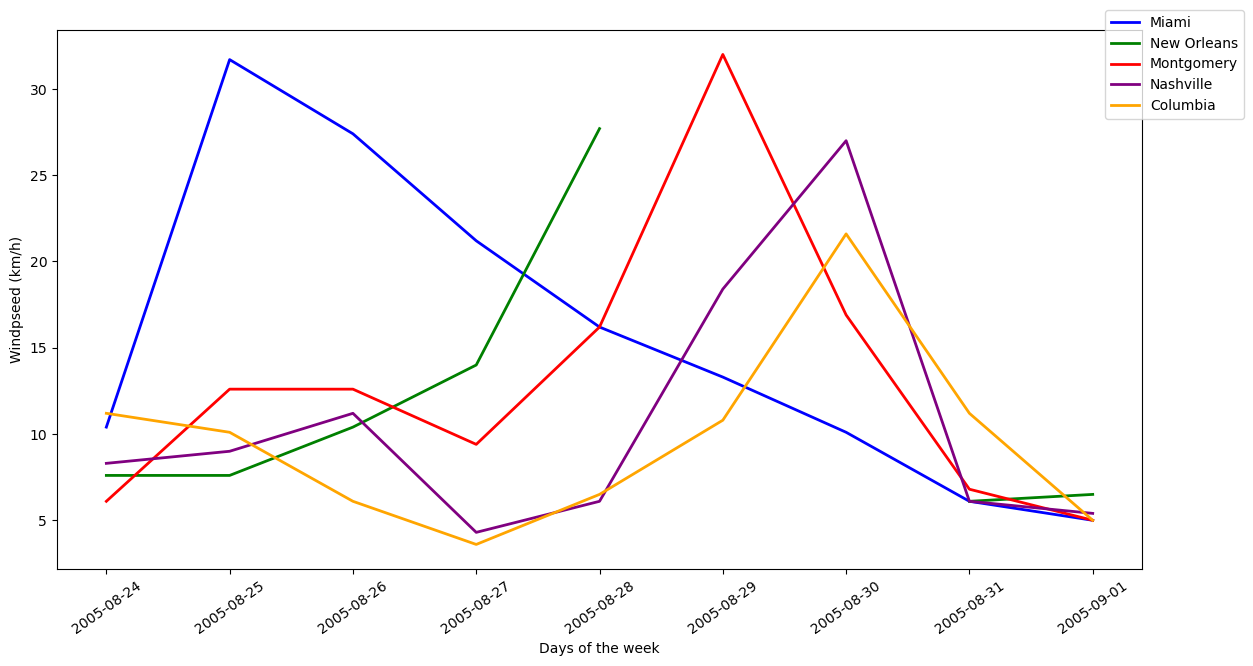

In [59]:
#Plotting wind speed in the 5 cities
plt.figure(figsize=(14,7))
plt.plot(weather_miami.date, weather_miami.avg_wind_speed, label='Miami', color='blue', linewidth=2)
plt.plot(weather_new_orleans.date, weather_new_orleans.avg_wind_speed, label='New Orleans', color='green', linewidth=2)
plt.plot(weather_montgomery.date, weather_montgomery.avg_wind_speed, label='Montgomery', color='red', linewidth=2)
plt.plot(weather_nashville.date, weather_nashville.avg_wind_speed, label='Nashville', color='purple', linewidth=2)
plt.plot(weather_columbia.date, weather_columbia.avg_wind_speed, label='Columbia', color='orange', linewidth=2)

plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.xlabel('Days of the week')
plt.ylabel('Windpseed (km/h)')
#
#plt.title('Windspeed Comparison in selected 5 locations')
plt.xticks(rotation=35)
plt.show();

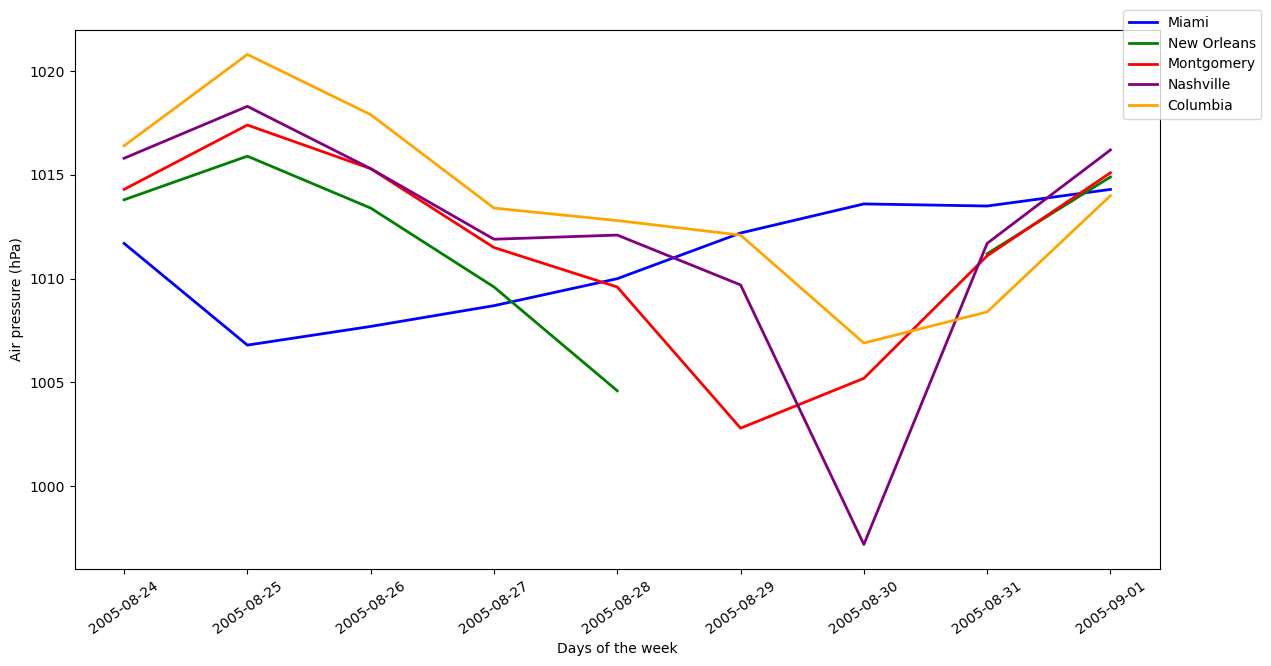

In [60]:
#Plotting air pressure in the 5 cities
plt.figure(figsize=(14,7))
plt.plot(weather_miami.date, weather_miami.air_pressure, label='Miami', color='blue', linewidth=2)
plt.plot(weather_new_orleans.date, weather_new_orleans.air_pressure, label='New Orleans', color='green', linewidth=2)
plt.plot(weather_montgomery.date, weather_montgomery.air_pressure, label='Montgomery', color='red', linewidth=2)
plt.plot(weather_nashville.date, weather_nashville.air_pressure, label='Nashville', color='purple', linewidth=2)
plt.plot(weather_columbia.date, weather_columbia.air_pressure, label='Columbia', color='orange', linewidth=2)

plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.xlabel('Days of the week')
plt.ylabel('Air pressure (hPa)')
#
#plt.title('Air pressure Comparison in selected 5 locations')
plt.xticks(rotation=35)
plt.show();

## 5.2. Analysis of flights

Let's recall the df_flights_katrina:

In [61]:
df_flights_katrina.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
0,2005-08-24,1252.0,1257,-5.0,1446.0,1449,-3.0,DL,N109DL,356,MIA,ATL,87.0,114.0,595.0,0,0
1,2005-08-24,1608.0,1607,1.0,1629.0,1637,-8.0,DL,N629DL,415,ATL,MSY,65.0,81.0,425.0,0,0
2,2005-08-24,856.0,901,-5.0,1010.0,1001,9.0,DL,N309DL,470,CVG,MSY,99.0,134.0,700.0,0,0
3,2005-08-24,1748.0,1750,-2.0,1747.0,1756,-9.0,DL,N944DL,483,ATL,BNA,38.0,59.0,214.0,0,0
4,2005-08-24,1803.0,1744,19.0,1955.0,1943,12.0,DL,N674DL,489,MIA,ATL,87.0,112.0,595.0,0,0


There are certain columns that are not relevant for the analysis. I will create a new df with selected ones.

In [62]:
flights_katrina = df_flights_katrina[['flight_date', 'origin', 'dest', 'cancelled', 'diverted']]
flights_katrina

,flight_date,origin,dest,cancelled,diverted
0,2005-08-24,MIA,ATL,0,0
1,2005-08-24,ATL,MSY,0,0
2,2005-08-24,CVG,MSY,0,0
3,2005-08-24,ATL,BNA,0,0
4,2005-08-24,MIA,ATL,0,0
...,...,...,...,...,...
9337,2005-09-01,TPA,MSY,1,0
9338,2005-09-01,TPA,MSY,0,1
9339,2005-09-01,TPA,MSY,0,1
9340,2005-09-01,TPA,MSY,0,1


I will create a df per airport with cancelled and diverted count, considering origin and destination. These columns work with 0 and 1 values, where 0 means that the flight was not cancelled or diverted and 1 means that the flight was cancelled or diverted. This time I will focus on 2 cities: Miami and New Orleans.

In [63]:
# Filtering for cancelled flights departing from MIA (origin) and arriving at MIA (dest)
cancelled_flights_mia_origin = flights_katrina[(flights_katrina['cancelled'] == 1) & 
                                              (flights_katrina['origin']== 'MIA')]
cancelled_flights_mia_dest = flights_katrina[(flights_katrina['cancelled'] == 1) & 
                                            (flights_katrina['dest'] == 'MIA')]

In [64]:
display(cancelled_flights_mia_origin)
display(cancelled_flights_mia_dest)

,flight_date,origin,dest,cancelled,diverted
68,2005-08-24,MIA,ATL,1,0
78,2005-08-25,MIA,ATL,1,0
103,2005-08-25,MIA,ATL,1,0
108,2005-08-25,MIA,ATL,1,0
203,2005-08-26,MIA,ATL,1,0
...,...,...,...,...,...
8277,2005-08-26,MIA,ORD,1,0
8346,2005-09-01,MIA,MSY,1,0
8360,2005-09-01,MIA,MSY,1,0
8435,2005-09-01,MIA,MSY,1,0


,flight_date,origin,dest,cancelled,diverted
88,2005-08-25,ATL,MIA,1,0
122,2005-08-25,ATL,MIA,1,0
130,2005-08-25,ATL,MIA,1,0
133,2005-08-25,ATL,MIA,1,0
140,2005-08-25,ATL,MIA,1,0
...,...,...,...,...,...
8345,2005-09-01,MSY,MIA,1,0
8352,2005-09-01,MSY,MIA,1,0
8436,2005-09-01,STX,MIA,1,0
8534,2005-09-01,MSY,MIA,1,0


Calculating the amount of cancelled flights per day:

In [65]:
cancelled_flights_mia = pd.concat([cancelled_flights_mia_origin, cancelled_flights_mia_dest])
cancelled_flights_by_date_mia = cancelled_flights_mia.groupby('flight_date').size().reset_index(name='cancelled_count')
cancelled_flights_by_date_mia

,flight_date,cancelled_count
0,2005-08-24,4
1,2005-08-25,143
2,2005-08-26,166
3,2005-08-27,37
4,2005-08-28,5
5,2005-08-29,10
6,2005-08-30,16
7,2005-08-31,8
8,2005-09-01,9


We see a peak on the 25th and 26th, following by 27th, 29th, and 30th August. The number of cancelled flights on the 25th and 26th coincides with the dates at which the hurricane hit the east coast of the United States.

Let's check for diverted flights from or to MIA airport:

In [67]:
diverted_flights_mia_origin = flights_katrina[(flights_katrina['diverted'] == 1) & 
                                              (flights_katrina['origin']== 'MIA')]
diverted_flights_mia_dest = flights_katrina[(flights_katrina['diverted'] == 1) & 
                                            (flights_katrina['dest'] == 'MIA')]
diverted_flights_mia = pd.concat([diverted_flights_mia_origin, diverted_flights_mia_dest])
diverted_flights_by_date_mia = diverted_flights_mia.groupby('flight_date').size().reset_index(name='diverted_count')
diverted_flights_by_date_mia

,flight_date,diverted_count
0,2005-08-25,1


Only one flight diverted.

In [72]:
#Creating a new df for Miami Affected Flights 
miami_flights_affected = pd.merge(cancelled_flights_by_date_mia, diverted_flights_by_date_mia, how='outer', on='flight_date')
miami_flights_affected

,flight_date,cancelled_count,diverted_count
0,2005-08-24,4,NaN
1,2005-08-25,143,1.0
2,2005-08-26,166,NaN
3,2005-08-27,37,NaN
4,2005-08-28,5,NaN
5,2005-08-29,10,NaN
6,2005-08-30,16,NaN
7,2005-08-31,8,NaN
8,2005-09-01,9,NaN


In [76]:
#Replacing NaN values with 0
miami_flights_affected['diverted_count'] = miami_flights_affected['diverted_count'].fillna(0)

In [78]:
miami_flights_affected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   flight_date      9 non-null      datetime64[ns]
 1   cancelled_count  9 non-null      int64         
 2   diverted_count   9 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 344.0 bytes


In [79]:
miami_flights_affected['diverted_count'] = miami_flights_affected['diverted_count'].astype(int)

In [80]:
miami_flights_affected

,flight_date,cancelled_count,diverted_count
0,2005-08-24,4,0
1,2005-08-25,143,1
2,2005-08-26,166,0
3,2005-08-27,37,0
4,2005-08-28,5,0
5,2005-08-29,10,0
6,2005-08-30,16,0
7,2005-08-31,8,0
8,2005-09-01,9,0


Now it's the turn for New Orleans airport (MGM).

In [69]:
#Cancelled flights
cancelled_flights_msy_origin = flights_katrina[(flights_katrina['cancelled'] == 1) & 
                                              (flights_katrina['origin']== 'MSY')]
cancelled_flights_msy_dest = flights_katrina[(flights_katrina['cancelled'] == 1) & 
                                            (flights_katrina['dest'] == 'MSY')]
cancelled_flights_msy = pd.concat([cancelled_flights_msy_origin, cancelled_flights_msy_dest])
cancelled_flights_by_date_msy = cancelled_flights_msy.groupby('flight_date').size().reset_index(name='cancelled_count')
cancelled_flights_by_date_msy

,flight_date,cancelled_count
0,2005-08-24,2
1,2005-08-25,10
2,2005-08-26,7
3,2005-08-27,8
4,2005-08-28,159
5,2005-08-29,269
6,2005-08-30,265
7,2005-08-31,284
8,2005-09-01,276


The peak starts on 28th lasting until 1st Sept. Katrina arrived on 28th August at New Orleans and its extreme effects lasted months.

In [70]:
#Diverted flights
diverted_flights_msy_origin = flights_katrina[(flights_katrina['diverted'] == 1) & 
                                              (flights_katrina['origin']== 'MSY')]
diverted_flights_msy_dest = flights_katrina[(flights_katrina['diverted'] == 1) & 
                                            (flights_katrina['dest'] == 'MSY')]
diverted_flights_msy = pd.concat([diverted_flights_msy_origin, diverted_flights_msy_dest])
diverted_flights_by_date_msy = diverted_flights_msy.groupby('flight_date').size().reset_index(name='diverted_count')
diverted_flights_by_date_msy

,flight_date,diverted_count
0,2005-08-24,1
1,2005-08-28,14
2,2005-08-29,33
3,2005-08-30,28
4,2005-08-31,12
5,2005-09-01,23


Here we see that many more flights were diverted.

In [73]:
#Creating a new df for New Orleans Affected Flights
new_orleans_flights_affected = pd.merge(cancelled_flights_by_date_msy, diverted_flights_by_date_msy, how='outer', on='flight_date')
new_orleans_flights_affected

,flight_date,cancelled_count,diverted_count
0,2005-08-24,2,1.0
1,2005-08-25,10,NaN
2,2005-08-26,7,NaN
3,2005-08-27,8,NaN
4,2005-08-28,159,14.0
5,2005-08-29,269,33.0
6,2005-08-30,265,28.0
7,2005-08-31,284,12.0
8,2005-09-01,276,23.0


In [81]:
#Filling NaN values with 0
new_orleans_flights_affected['diverted_count'] = new_orleans_flights_affected['diverted_count'].fillna(0)
new_orleans_flights_affected

,flight_date,cancelled_count,diverted_count
0,2005-08-24,2,1.0
1,2005-08-25,10,0.0
2,2005-08-26,7,0.0
3,2005-08-27,8,0.0
4,2005-08-28,159,14.0
5,2005-08-29,269,33.0
6,2005-08-30,265,28.0
7,2005-08-31,284,12.0
8,2005-09-01,276,23.0


In [82]:
new_orleans_flights_affected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   flight_date      9 non-null      datetime64[ns]
 1   cancelled_count  9 non-null      int64         
 2   diverted_count   9 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 344.0 bytes


In [83]:
new_orleans_flights_affected['diverted_count'] = new_orleans_flights_affected['diverted_count'].astype(int)
new_orleans_flights_affected

,flight_date,cancelled_count,diverted_count
0,2005-08-24,2,1
1,2005-08-25,10,0
2,2005-08-26,7,0
3,2005-08-27,8,0
4,2005-08-28,159,14
5,2005-08-29,269,33
6,2005-08-30,265,28
7,2005-08-31,284,12
8,2005-09-01,276,23


Now I will plot the number of cancelled and diverted flights per day of both airports.

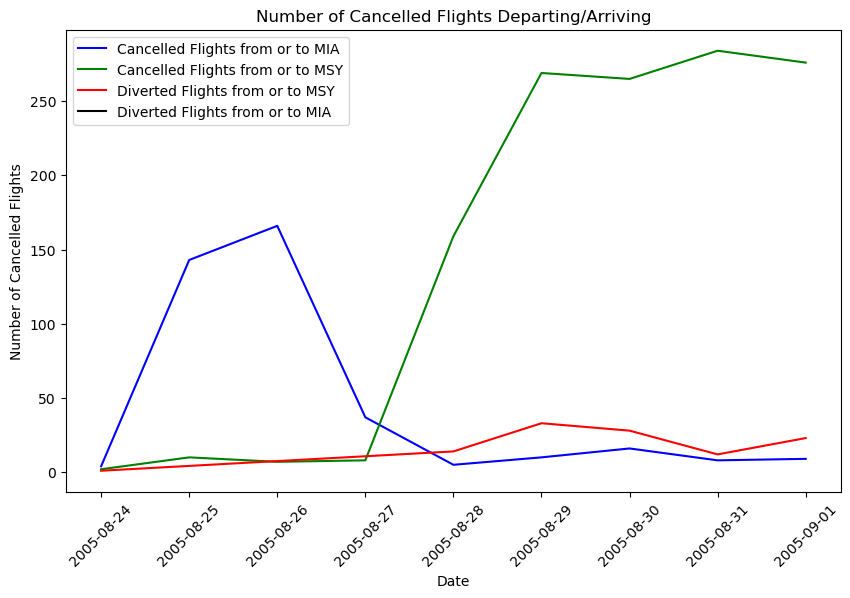

In [85]:
# Plot the number of cancelled flights per day
plt.figure(figsize=(10,6))
plt.plot(cancelled_flights_by_date_mia['flight_date'], cancelled_flights_by_date_mia['cancelled_count'], color='blue', label='Cancelled Flights from or to MIA')
plt.plot(cancelled_flights_by_date_msy['flight_date'], cancelled_flights_by_date_msy['cancelled_count'], color='green', label='Cancelled Flights from or to MSY')
plt.plot(diverted_flights_by_date_msy['flight_date'], diverted_flights_by_date_msy['diverted_count'], color='red', label='Diverted Flights from or to MSY')
plt.plot(diverted_flights_by_date_mia['flight_date'], diverted_flights_by_date_mia['diverted_count'], color='black', label='Diverted Flights from or to MIA')

plt.title('Number of Cancelled Flights Departing/Arriving')
plt.xlabel('Date')
plt.ylabel('Number of Cancelled Flights')

plt.xticks(rotation=45)
plt.legend()
plt.show()

Now let's merge weather and flights data

New Orleans

In [87]:
display(new_orleans_flights_affected.flight_date.info())
display(weather_new_orleans.date.info())

<class 'pandas.core.series.Series'>
RangeIndex: 9 entries, 0 to 8
Series name: flight_date
Non-Null Count  Dtype         
--------------  -----         
9 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 200.0 bytes


None

<class 'pandas.core.series.Series'>
Index: 9 entries, 9 to 17
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
9 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes


None

In [88]:
new_orleans_fa = new_orleans_flights_affected.copy()  #making sure there is an unmodified original
new_orleans_fa["flight_date"] = new_orleans_fa["flight_date"].astype(str) #converting date to string to be able to merge
new_orleans_fa

,flight_date,cancelled_count,diverted_count
0,2005-08-24,2,1
1,2005-08-25,10,0
2,2005-08-26,7,0
3,2005-08-27,8,0
4,2005-08-28,159,14
5,2005-08-29,269,33
6,2005-08-30,265,28
7,2005-08-31,284,12
8,2005-09-01,276,23


In [89]:
new_orleans_fa.rename(columns={'flight_date':'date'}, inplace=True) #renaming column to match
new_orleans_fa.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9 entries, 0 to 8
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


In [91]:
weather_new_orleans

,date,avg_temp,min_temp,max_temp,rain_in_mm,avg_wind_speed,air_pressure,weather_station
9,2005-08-24,29.0,25.6,33.3,1.8,7.6,1013.8,New Orleans Airport
10,2005-08-25,29.8,26.7,32.8,2.5,7.6,1015.9,New Orleans Airport
11,2005-08-26,30.3,26.7,33.9,0.0,10.4,1013.4,New Orleans Airport
12,2005-08-27,30.5,27.2,33.9,0.0,14.0,1009.6,New Orleans Airport
13,2005-08-28,28.9,26.1,32.8,16.5,27.7,1004.6,New Orleans Airport
14,2005-08-29,NaN,25.0,32.8,114.3,NaN,NaN,New Orleans Airport
15,2005-08-30,NaN,27.2,33.3,0.0,NaN,NaN,New Orleans Airport
16,2005-08-31,NaN,26.7,33.3,0.0,6.1,1011.2,New Orleans Airport
17,2005-09-01,27.2,23.3,31.1,18.0,6.5,1014.9,New Orleans Airport


In [92]:
new_orleans_flights_weather = pd.merge(new_orleans_fa, weather_new_orleans, on='date')
new_orleans_flights_weather

,date,cancelled_count,diverted_count,avg_temp,min_temp,max_temp,rain_in_mm,avg_wind_speed,air_pressure,weather_station


This should have worked since column date on both dataframes are in the same format. Let's check:

In [93]:
# Checking the date values and types in both dataframes
print("Dates in new_orleans_fa:")
print(new_orleans_fa['date'].head())
print("\nDates in weather_new_orleans:")
print(weather_new_orleans['date'].head())

# Checking data types
print("\nDate column type in new_orleans_fa:", new_orleans_fa['date'].dtype)
print("Date column type in weather_new_orleans:", weather_new_orleans['date'].dtype)


Dates in new_orleans_fa:
0    2005-08-24
1    2005-08-25
2    2005-08-26
3    2005-08-27
4    2005-08-28
Name: date, dtype: object

Dates in weather_new_orleans:
9     2005-08-24
10    2005-08-25
11    2005-08-26
12    2005-08-27
13    2005-08-28
Name: date, dtype: object

Date column type in new_orleans_fa: object
Date column type in weather_new_orleans: object


In [94]:
# Show common dates between both dataframes
common_dates = set(new_orleans_fa['date']).intersection(set(weather_new_orleans['date']))
print("Number of common dates:", len(common_dates))
print("\nSample of common dates:")
print(list(common_dates)[:5])

# Show the full range of dates in each dataframe
print("\nDate range in new_orleans_fa:")
print("From:", new_orleans_fa['date'].min(), "to:", new_orleans_fa['date'].max())
print("\nDate range in weather_new_orleans:")
print("From:", weather_new_orleans['date'].min(), "to:", weather_new_orleans['date'].max())


Number of common dates: 0

Sample of common dates:
[]

Date range in new_orleans_fa:
From: 2005-08-24 to: 2005-09-01

Date range in weather_new_orleans:
From: 2005-08-24 to: 2005-09-01


Everything seems to match, but not working. I will convert the strings to date dtypes and try again.

In [95]:
# Converting from string to datetime
new_orleans_fa['date'] = pd.to_datetime(new_orleans_fa['date']).dt.date
weather_new_orleans['date'] = pd.to_datetime(weather_new_orleans['date']).dt.date

# Merging again
new_orleans_flights_weather = pd.merge(new_orleans_fa, weather_new_orleans, on='date')


C:\Users\fiori\AppData\Local\Temp\ipykernel_3772\3773823690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_new_orleans['date'] = pd.to_datetime(weather_new_orleans['date']).dt.date


In [96]:
new_orleans_flights_weather

,date,cancelled_count,diverted_count,avg_temp,min_temp,max_temp,rain_in_mm,avg_wind_speed,air_pressure,weather_station
0,2005-08-24,2,1,29.0,25.6,33.3,1.8,7.6,1013.8,New Orleans Airport
1,2005-08-25,10,0,29.8,26.7,32.8,2.5,7.6,1015.9,New Orleans Airport
2,2005-08-26,7,0,30.3,26.7,33.9,0.0,10.4,1013.4,New Orleans Airport
3,2005-08-27,8,0,30.5,27.2,33.9,0.0,14.0,1009.6,New Orleans Airport
4,2005-08-28,159,14,28.9,26.1,32.8,16.5,27.7,1004.6,New Orleans Airport
5,2005-08-29,269,33,NaN,25.0,32.8,114.3,NaN,NaN,New Orleans Airport
6,2005-08-30,265,28,NaN,27.2,33.3,0.0,NaN,NaN,New Orleans Airport
7,2005-08-31,284,12,NaN,26.7,33.3,0.0,6.1,1011.2,New Orleans Airport
8,2005-09-01,276,23,27.2,23.3,31.1,18.0,6.5,1014.9,New Orleans Airport


Now it worked. Now Miami.

In [97]:
miami_fa = miami_flights_affected.copy()
miami_fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   flight_date      9 non-null      datetime64[ns]
 1   cancelled_count  9 non-null      int64         
 2   diverted_count   9 non-null      int32         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 308.0 bytes


In [98]:
weather_miami.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             9 non-null      object 
 1   avg_temp         9 non-null      float64
 2   min_temp         9 non-null      float64
 3   max_temp         9 non-null      float64
 4   rain_in_mm       9 non-null      float64
 5   avg_wind_speed   9 non-null      float64
 6   air_pressure     9 non-null      float64
 7   weather_station  9 non-null      object 
dtypes: float64(6), object(2)
memory usage: 648.0+ bytes


In [99]:
miami_fa["flight_date"] = miami_fa["flight_date"].astype(str) 
miami_fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   flight_date      9 non-null      object
 1   cancelled_count  9 non-null      int64 
 2   diverted_count   9 non-null      int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 308.0+ bytes


In [100]:
miami_fa.rename(columns={'flight_date':'date'}, inplace=True) 
miami_fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             9 non-null      object
 1   cancelled_count  9 non-null      int64 
 2   diverted_count   9 non-null      int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 308.0+ bytes


In [101]:
miami_flights_weather = pd.merge(miami_fa, weather_miami, on='date')
miami_flights_weather

,date,cancelled_count,diverted_count,avg_temp,min_temp,max_temp,rain_in_mm,avg_wind_speed,air_pressure,weather_station


In [102]:
#Same problem. Same solution
miami_fa['date'] = pd.to_datetime(miami_fa['date']).dt.date
weather_miami['date'] = pd.to_datetime(weather_miami['date']).dt.date

# Merging again
miami_flights_weather = pd.merge(miami_fa, weather_miami, on='date')
miami_flights_weather

C:\Users\fiori\AppData\Local\Temp\ipykernel_3772\2461088644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_miami['date'] = pd.to_datetime(weather_miami['date']).dt.date


,date,cancelled_count,diverted_count,avg_temp,min_temp,max_temp,rain_in_mm,avg_wind_speed,air_pressure,weather_station
0,2005-08-24,4,0,29.7,26.7,33.3,1.3,10.4,1011.7,Miami International Airport
1,2005-08-25,143,1,26.5,23.9,27.8,106.2,31.7,1006.8,Miami International Airport
2,2005-08-26,166,0,27.2,23.9,29.4,20.8,27.4,1007.7,Miami International Airport
3,2005-08-27,37,0,28.6,24.4,31.7,15.0,21.2,1008.7,Miami International Airport
4,2005-08-28,5,0,29.6,26.7,32.8,4.6,16.2,1010.0,Miami International Airport
5,2005-08-29,10,0,29.7,27.2,33.3,0.0,13.3,1012.2,Miami International Airport
6,2005-08-30,16,0,29.4,27.2,33.9,0.0,10.1,1013.6,Miami International Airport
7,2005-08-31,8,0,28.6,25.6,32.8,6.1,6.1,1013.5,Miami International Airport
8,2005-09-01,9,0,28.1,25.0,33.9,0.3,5.0,1014.3,Miami International Airport


In [104]:
miami_flights_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             9 non-null      object 
 1   cancelled_count  9 non-null      int64  
 2   diverted_count   9 non-null      int32  
 3   avg_temp         9 non-null      float64
 4   min_temp         9 non-null      float64
 5   max_temp         9 non-null      float64
 6   rain_in_mm       9 non-null      float64
 7   avg_wind_speed   9 non-null      float64
 8   air_pressure     9 non-null      float64
 9   weather_station  9 non-null      object 
dtypes: float64(6), int32(1), int64(1), object(2)
memory usage: 812.0+ bytes


Shall we plot weather and flights?

## 5.3. Comparison between cancelled flights and rain in Miami

In [105]:
#During the last merge, date column dtype changed to object. Before plottin, let's convert it to datetime
miami_flights_weather['date'] = pd.to_datetime(miami_flights_weather['date'])

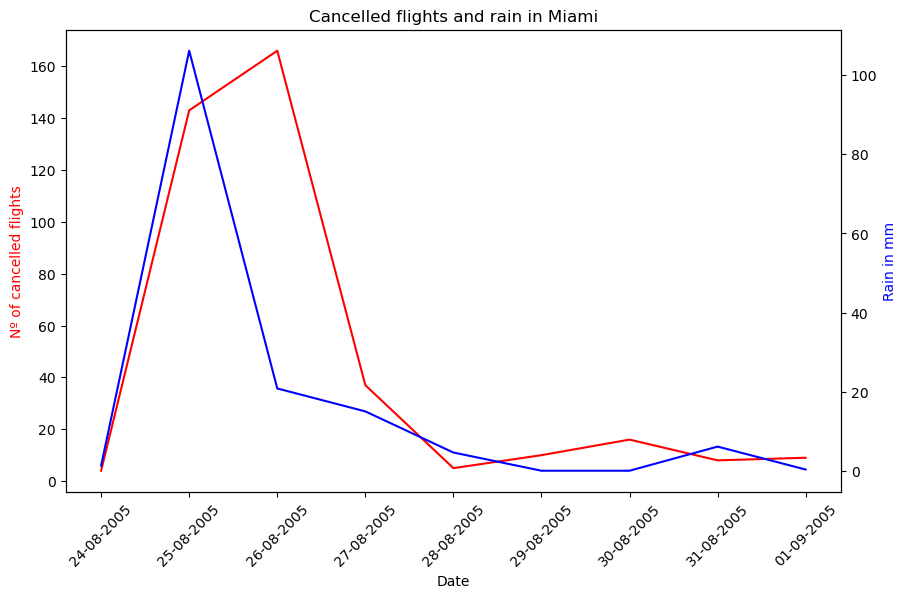

In [120]:
fig, ax1 = plt.subplots(figsize=(10,6))

# axis x
ax1.set_xlabel('Date')
ax1.set_xticks(miami_flights_weather['date']) 
ax1.set_xticklabels(miami_flights_weather['date'].dt.strftime('%d-%m-%Y'), rotation=45) 

# y axis to the left
ax1.set_ylabel('Nº of cancelled flights', color='red')
ax1.plot(miami_flights_weather['date'], miami_flights_weather['cancelled_count'], color='red', label='Cancelled flights')

# y axis to the right
ax2 = ax1.twinx()  #add a new axis to the right
ax2.set_ylabel('Rain in mm', color='blue')
ax2.plot(miami_flights_weather['date'], miami_flights_weather['rain_in_mm'], color='blue', label='Rain in mm')

plt.title('Cancelled flights and rain in Miami')
#fig.tight_layout()

plt.show()

## 5.4. Comparison between cancelled flights and temperature in Miami

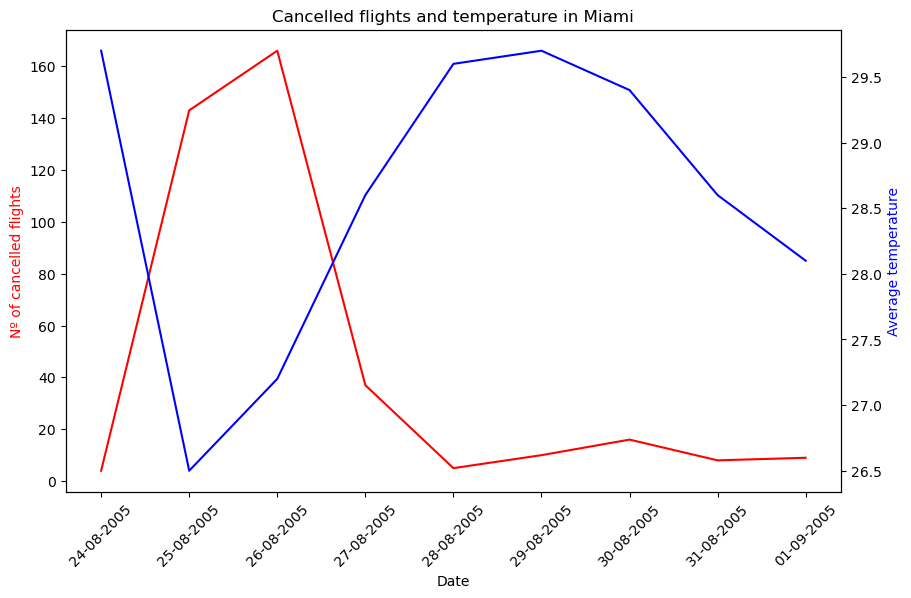

In [119]:
fig, ax1 = plt.subplots(figsize=(10,6))
# axis x
ax1.set_xlabel('Date')
ax1.set_xticks(miami_flights_weather['date']) 
ax1.set_xticklabels(miami_flights_weather['date'].dt.strftime('%d-%m-%Y'), rotation=45) 

# y axis to the left
ax1.set_ylabel('Nº of cancelled flights', color='red')
ax1.plot(miami_flights_weather['date'], miami_flights_weather['cancelled_count'], color='red', label='Cancelled flights')

# y axis to the right
ax2 = ax1.twinx()  # new axis to the right
ax2.set_ylabel('Average temperature', color='blue')
ax2.plot(miami_flights_weather['date'], miami_flights_weather['avg_temp'], color='blue', label='Average temperature')

plt.title('Cancelled flights and temperature in Miami')
#fig.tight_layout()

plt.show()

## 5.5. Comparison between cancelled flights and air pressure in Miami

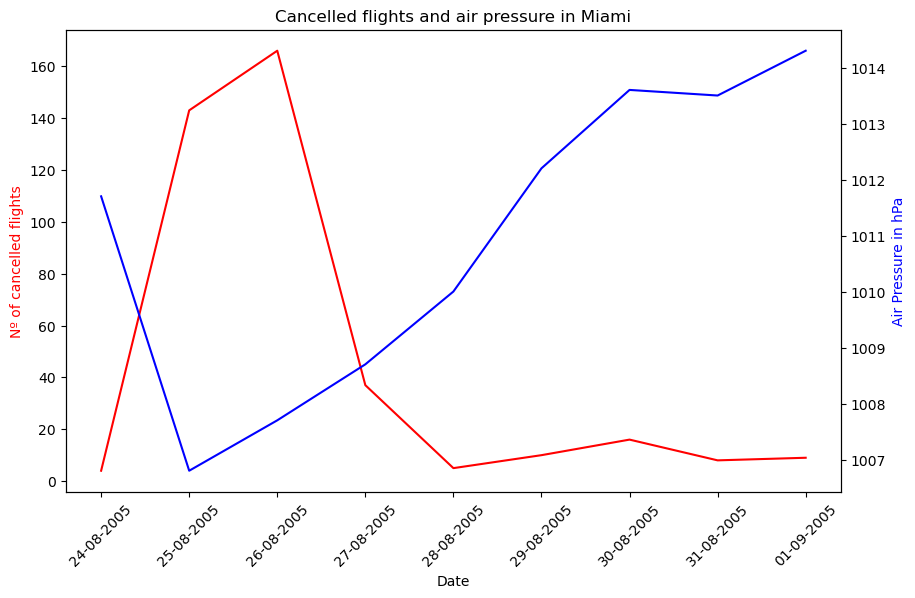

In [118]:
fig, ax1 = plt.subplots(figsize=(10,6))
# axis x
ax1.set_xlabel('Date')
ax1.set_xticks(miami_flights_weather['date']) 
ax1.set_xticklabels(miami_flights_weather['date'].dt.strftime('%d-%m-%Y'), rotation=45) 

# y axis to the left
ax1.set_ylabel('Nº of cancelled flights', color='red')
ax1.plot(miami_flights_weather['date'], miami_flights_weather['cancelled_count'], color='red', label='Cancelled flights')

# y axis to the right
ax2 = ax1.twinx()  #add a new axis to the right
ax2.set_ylabel('Air Pressure in hPa', color='blue')
ax2.plot(miami_flights_weather['date'], miami_flights_weather['air_pressure'], color='blue', label='Average air pressure in hPa')

plt.title('Cancelled flights and air pressure in Miami')
#fig.tight_layout()

plt.show()

## 5.6. Comparison between cancelled flights and wind speed in Miami

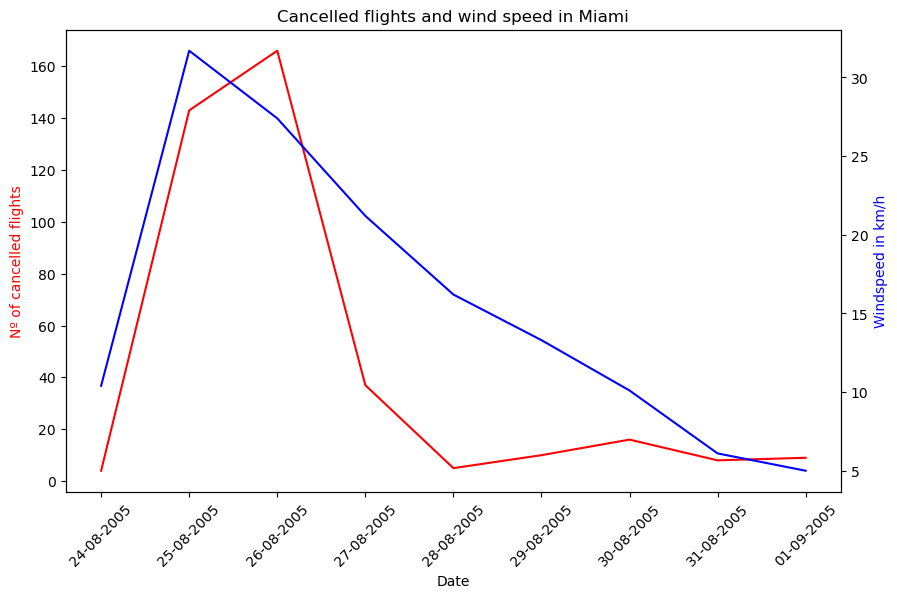

In [122]:
fig, ax1 = plt.subplots(figsize=(10,6))
# axis x
ax1.set_xlabel('Date')
ax1.set_xticks(miami_flights_weather['date']) 
ax1.set_xticklabels(miami_flights_weather['date'].dt.strftime('%d-%m-%Y'), rotation=45) 

# y axis to the left
ax1.set_ylabel('Nº of cancelled flights', color='red')
ax1.plot(miami_flights_weather['date'], miami_flights_weather['cancelled_count'], color='red', label='Cancelled flights')

# y axis to the right
ax2 = ax1.twinx()  #add a new axis to the right
ax2.set_ylabel('Windspeed in km/h', color='blue')
ax2.plot(miami_flights_weather['date'], miami_flights_weather['avg_wind_speed'], color='blue', label='Average wind speed')

plt.title('Cancelled flights and wind speed in Miami')
#fig.tight_layout()

plt.show()